In [1]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=029aa8f04d4b25d624547b8965981bf330e0efb0620c22e269db1cf3216eabbe
  Stored in directory: /home/jovyan/.cache/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [3]:
from bs4 import BeautifulSoup
import requests

In [42]:
base_link = "https://www.lamoda.ru"
women_base = f"{base_link}/women-home/"
# man-home , kids-home

In [43]:
response = requests.get(women_base)

In [92]:
page_soup = BeautifulSoup(response.content, "html.parser")

In [93]:
import re

In [108]:
items = ["Одежда", "Обувь"]
nav = page_soup.find("div", {"class" : "d-header-top-menu-wrapper"})
for item in items:
    element = nav.find_all("a", string=re.compile(f".*{item}"))
    
cloth_link = page_soup.find_all(string=re.compile(f".*Одежда"))
cloth_link = "/c/355/clothes-zhenskaya-odezhda"   #TODO - get it from link

In [112]:
clothes = requests.get(f"{base_link}{cloth_link}")

In [120]:
clothes_soup = BeautifulSoup(clothes.content, "html.parser")

In [134]:
cloth_nav = clothes_soup.find("ul", {"class": "js-outlet-icons-slider"})
clothes = cloth_nav.find_all("a")
for cloth in clothes:
    print(cloth.attrs["href"].split("aim=")[1])

/c/369/clothes-platiya/
/c/399/clothes-bluzy-rubashki/
/c/2478/clothes-futbolki/
/c/3002/clothes-plyajnaya-odejda/
/c/423/clothes-yubki/
/c/401/clothes-bryuki-shorty-kombinezony/
/c/709/clothes-nizhneye-belyo/
/c/2485/clothes-shorty/
/c/367/clothes-pidzhaki-zhaketi/
/c/2627/clothes-topy/
/c/397/clothes-d-insy/
/c/4651/clothes-dom-odejda/
/c/4184/clothes-coveralls/
/c/2474/clothes-tolstovki-olimpiyki/
/c/2463/clothes-zenskie-vetrovki/
/c/371/clothes-trikotazh/


In [147]:
clothes = requests.get(f"{base_link}/c/369/clothes-platiya/?page=1")
clothes_soup = BeautifulSoup(clothes.content, "html.parser")

In [186]:
import os
cloth_nav = clothes_soup.find("div", {"class": "products-catalog__list"})
clothes = cloth_nav.find_all("div", {"class": "products-list-item"})
for cloth in clothes: 
    images = cloth.attrs["data-gallery"].replace("[","").replace("]","").replace('"',"").split(",")
    sku = cloth.attrs["data-sku"]
    os.mkdir(f"temp/{sku}")
    i = 1
    for image in images:
        url = f"http:{image.strip()}"
        image = requests.get(url)
        file = open(f"temp/{sku}/{i}.jpg", "wb")
        file.write(image.content)
        file.close()
        i += 1

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

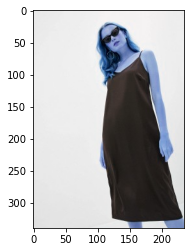

In [179]:
img = cv2.imread("sample_image.jpg")
plt.imshow(img)
